In [77]:
import sys
import os
sys.path.append(os.path.abspath("../"))  # or "../../" depending on location

In [78]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader
from utils.likelihood import *
from utils.formate_matrix_toMLData import *
from models.model_0916 import *
import matplotlib.pyplot as plt
import japanize_matplotlib
plt.rcParams["font.size"] = 22
np.set_printoptions(suppress=True)


In [79]:

device = torch.device("cpu")
model = DeepSets_varSets_forDiagnel(device=device).to(device)
model.load_state_dict(torch.load("../model_weights/mixed_distribution/mixed_0924.pth", map_location=device))
model.eval()

/var/folders/k3/b1t1gjg12pg0ycfdgpm2k7g00000gn/T/ipykernel_55445/1581625513.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("../model_we

DeepSets_varSets_forDiagnel(
  (embedding): Embedding(5, 16, padding_idx=0)
  (fc1): Linear(in_features=33, out_features=256, bias=True)
  (ln1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
  (fc2): Linear(in_features=256, out_features=512, bias=True)
  (ln2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
  (drop): Dropout(p=0.2, inplace=False)
  (att_fc): Linear(in_features=512, out_features=512, bias=True)
  (att_score): Linear(in_features=512, out_features=1, bias=True)
  (out_fc1): Linear(in_features=512, out_features=128, bias=True)
  (out_ln1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
  (out_fc2): Linear(in_features=128, out_features=64, bias=True)
  (out_ln2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
  (out_fc3): Linear(in_features=64, out_features=3, bias=True)
)

In [87]:
data_name = "shoban"
real_data_dir = f"../real_data/{data_name}.csv"
if data_name == "RCBridge":
    df = pd.read_csv(real_data_dir, delimiter=",",header = None)
else:
    df = pd.read_csv(real_data_dir, delimiter=",")
display(df.head())
print(df.columns)

,道路名+橋梁名+上下線+橋台橋脚番号no,Be(1-4),Af(1-4),点検日Ｂｅ,点検日Ａｆ,Ins,供用開始＝1,パネル位置\n【数字】,パネル位置\n【英字】,桁端部=1,...,データ詳細\n 下＝1，\n 下+＝2，\n 複東＝3，\n 複西＝4,説明変数\nパネル位置\n【数字】,説明変数\nパネル位置\n【英字A】,説明変数\nパネル位置\n【英字B】,説明変数\nパネル位置\n【英字AB】,累積軸数\n0-3：3000万軸未満\n4：3000万軸以上.1,凍結防止剤\n0-3：1000ｔ未満\n4：1000ｔ以上.1,Unnamed: 28,示方書,Unnamed: 30
0,2,1,1,1975,1997,22,1,1,1,1,...,1,1,1,0,1,0,0,連続,S47（-2012），H14,NaN
1,2,1,1,1997,1999,2,0,1,1,1,...,1,1,1,0,1,0,0,連続,S47（-2012），H14,NaN
2,2,1,1,1999,2000,1,0,1,1,1,...,1,1,1,0,1,0,0,連続,S47（-2012），H14,NaN
3,2,1,1,2000,2001,1,0,1,1,1,...,1,1,1,0,1,0,0,連続,S47（-2012），H14,NaN
4,2,1,1,2001,2004,3,0,1,1,1,...,1,1,1,0,1,0,0,連続,S47（-2012），H14,NaN


Index(['道路名+橋梁名+上下線+橋台橋脚番号no', 'Be(1-4)', 'Af(1-4)', '点検日Ｂｅ', '点検日Ａｆ', 'Ins',
       '供用開始＝1', 'パネル位置\n【数字】', 'パネル位置\n【英字】', '桁端部=1', '最小\n床版厚\n（cm）',
       '(21<J)…-1\n(21=J)…0\n(21>J)…1', '床版支間長\n（m）', '斜角\n最小角\n（度）',
       '橋梁（上下別）延長（橋梁単位）**', '合成非合成\n【合成＝1\n非合成＝0】', '海砂の使用\n【あり＝1\nなし＝0】',
       '累積軸数\n0-3：3000万軸未満\n4：3000万軸以上', '凍結防止剤\n0-3：1000ｔ未満\n4：1000ｔ以上',
       '飛来塩分\n【あり＝1\nなし＝0】', 'ＡＳＲ\n【あり＝1\nなし＝0】',
       'データ詳細\n　下＝1，\n　下+＝2，\n　複東＝3，\n　複西＝4', '説明変数\nパネル位置\n【数字】',
       '説明変数\nパネル位置\n【英字A】', '説明変数\nパネル位置\n【英字B】', '説明変数\nパネル位置\n【英字AB】',
       '累積軸数\n0-3：3000万軸未満\n4：3000万軸以上.1', '凍結防止剤\n0-3：1000ｔ未満\n4：1000ｔ以上.1',
       'Unnamed: 28', '示方書', 'Unnamed: 30'],
      dtype='object')


In [88]:
if data_name == "suidou":
    df = df.rename(columns={'建設時健全度（1と仮定）': "pre", '調査時健全度': "post", '経過年数': "time"})
if data_name == "shoban":
    df = df.rename(columns={'Be(1-4)': "pre", 'Af(1-4)': "post", 'Ins': "time"})
if data_name == "Frank":
    def grading(x):
        if x <= 30:
            return 1
        elif x <= 50:
            return 2
        elif x <= 70:
            return 3
        else: 4
    df["Post_IRI_Class"] = df['Post-State IRI'].apply(grading)
    df["Pre_IRI_Class"] = df['Pre-State IRI'].apply(grading)
    df["time"] = df['Inspection Time of PostState IRI']-df['Inspection Time of Prestate']
    df = df.rename(columns={'Pre_IRI_Class': "pre", 'Post_IRI_Class': "post"})
if data_name == "Tunnel":
    df = df.rename(columns={'事前健全度': "pre", '事後健全度': "post", '検査間隔(年)': "time"})
    df = df[["pre", "post", "time"]]
    df = df.dropna()
    df["pre"] = df["pre"].astype(int)
    df["post"] = df["post"].astype(int)
    df = df[df["time"] < 8]

if data_name == "RCBridge":
    df = df.rename(columns={0: "pre", 1: "post", 2: "time"})
    df = df[df["pre"] < 4]
    df = df[df["post"] < 5]

In [89]:
display(df.head())

,道路名+橋梁名+上下線+橋台橋脚番号no,pre,post,点検日Ｂｅ,点検日Ａｆ,time,供用開始＝1,パネル位置\n【数字】,パネル位置\n【英字】,桁端部=1,...,データ詳細\n 下＝1，\n 下+＝2，\n 複東＝3，\n 複西＝4,説明変数\nパネル位置\n【数字】,説明変数\nパネル位置\n【英字A】,説明変数\nパネル位置\n【英字B】,説明変数\nパネル位置\n【英字AB】,累積軸数\n0-3：3000万軸未満\n4：3000万軸以上.1,凍結防止剤\n0-3：1000ｔ未満\n4：1000ｔ以上.1,Unnamed: 28,示方書,Unnamed: 30
0,2,1,1,1975,1997,22,1,1,1,1,...,1,1,1,0,1,0,0,連続,S47（-2012），H14,NaN
1,2,1,1,1997,1999,2,0,1,1,1,...,1,1,1,0,1,0,0,連続,S47（-2012），H14,NaN
2,2,1,1,1999,2000,1,0,1,1,1,...,1,1,1,0,1,0,0,連続,S47（-2012），H14,NaN
3,2,1,1,2000,2001,1,0,1,1,1,...,1,1,1,0,1,0,0,連続,S47（-2012），H14,NaN
4,2,1,1,2001,2004,3,0,1,1,1,...,1,1,1,0,1,0,0,連続,S47（-2012），H14,NaN


13803


Text(0.5, 1.0, 'shobanの点検間隔分布')

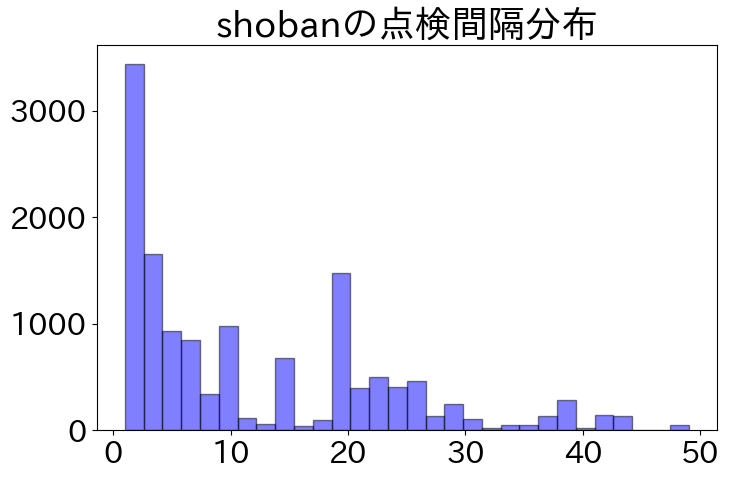

In [90]:
df = df[["pre", "post", "time"]]
# df = df[df["pre"] < 4]
# df = df[df["post"] < 5]
print(len(df))
r =1
plt.hist(df["time"], bins=30, alpha=0.5, color="blue", edgecolor="black", zorder= 2)
plt.title(f"{data_name}の点検間隔分布")

In [91]:
# likelihood process
state = np.array([df["pre"],df["post"]])
del_t = np.array(df["time"]/r)

data = np.column_stack((state.T,del_t.T))
ll = Likelihood_diagonal_exp(data)
Q = ll.optimize(np.array([-0.5,-1,-1.5]))
formater = formate_dataMatrix()
vec = formater.GetOutputVector_byDiagonal(Q)

In [92]:
dataset = varSets_Datasets([state],[del_t], [vec])
dataloader = DataLoader(dataset, batch_size=1,shuffle=False,collate_fn=collate_fn)
pred = []
expect = []
for a, b, c,d in dataloader:
    with torch.no_grad():
        out = model(a, b, d)
        pred = 1/out
        expect = 1/c
    print(f"output is {out}")
    print(f"target is {c}")
    print(1/out * r)
    print(1/c * r)

output is tensor([[0.0218, 0.2000, 0.1226]])
target is tensor([[0.0219, 0.1364, 0.1015]])
tensor([[45.8841,  5.0009,  8.1553]])
tensor([[45.6287,  7.3335,  9.8489]])


pred by 0911
output is tensor([[0.0600, 0.0434, 0.0229]])
target is tensor([[0.0448, 0.0530, 0.0258]])
tensor([[16.6536, 23.0492, 43.7582]])
tensor([[22.3031, 18.8850, 38.6929]])

代理モデルによる劣化推移予測


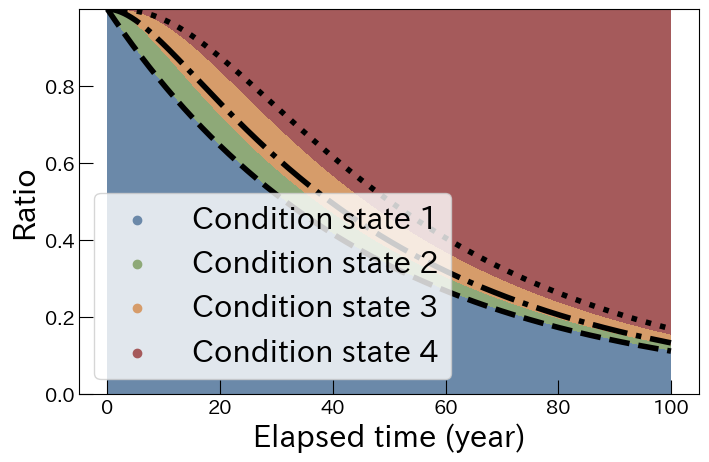

In [93]:
colors= ['#6b89a9', '#8ea978', '#d69c6a', '#a55a5b'] #彩度下げ冷暖色
plt.rcParams["figure.figsize"] = (8, 5)

sequence = np.arange(0, 100, 0.01)
def visualize(Q,title):
    vecs = []
    for t in sequence:
        P = expm(Q * t)
        vecs.append(P[0])
    
    for i, vec in enumerate(vecs):
        bottom = 0
        # vec = vec[::-1]
    
        for j, value in enumerate(vec):
            plt.bar(sequence[i], value, bottom=bottom, color=colors[j],width=0.01)
            bottom += value
    for i in range(len(colors)):
        plt.scatter([],[], color = colors[i],label = f"Condition state {i+1}")
    vecs = np.array(vecs)
    
    plot_trueline(c[0])
    plt.tick_params(axis='x', labelsize=14, direction='in', length=10)
    plt.tick_params(axis='y', labelsize=14, direction='in', length=10)
    plt.xlabel("Elapsed time (year)", fontsize = 22)
    plt.ylabel("Ratio", fontsize = 22)
    # plt.title(title, fontsize = 18)
    plt.legend(loc = "lower left")
    plt.show()
    
def generate_Q_from_diagonal(vec):
        Q = np.zeros((4,4))
        for i in range(len(vec)):
            Q[i,i+1]= vec[i]
            Q[i,i] = -Q[i,i+1]
        return Q
def plot_trueline(vec):
    true_vecs = []
    true_Q = generate_Q_from_diagonal(vec/r)
    for t in sequence:
        P = expm(true_Q * t)
        true_vecs.append(P[0])
    true_vecs = np.array(true_vecs)
    
    plt.plot(sequence,true_vecs[:,0],linestyle = "--",color = "black",lw = 4)
    plt.plot(sequence,true_vecs[:,0]+true_vecs[:,1],linestyle = "-.",color = "black",lw = 4)
    plt.plot(sequence,true_vecs[:,0]+true_vecs[:,1]+true_vecs[:,2],linestyle = ":",color = "black",lw = 4)
    

print("代理モデルによる劣化推移予測")
visualize(generate_Q_from_diagonal(out[0]/r),"代理モデルによる劣化推移予測")